# DAY 1: Regression


### Machine Learning and Computational Statistics (DSC6232)

#### Instructors: Weiwei Pan, Melanie Fernandez, Pavlos Protopapas

#### Due: July 22th, 2:00 pm Kigali Time

**First name**: LONGIN


**Last name**: DUSENEYEZU


## Learning Goals:

1. become familiar with sklearn libraries
2. understand, fit and predict using linear and polynomial regression
3. identify overfitting/underfitting 
4. split your data in train and test splits

In [ ]:
# import the necessary python libraries
import numpy as np
import matplotlib.pyplot as plt  

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### We include some auxiliary functions here that we will need to use later (no need to read in details!)

In [ ]:
''' Function to generate a toy dataset '''
def generate_toy_data(n_points=20, noise_std=0.25):

    x = np.linspace(-5, 5, n_points)

    #define a function relating input to output
    f = lambda x: 0.01 * x**3

    #generate noisy training labels
    y = f(x) + np.random.normal(0, noise_std, n_points)
    
    return x, y

## 1. Linear Regression (using sklearn library)

`sklearn` is a machine learning library for python. One nice property is that models share the same interface (every model has methods like `.fit`, `.predict` and `.predict_proba`).

Let's fit a linear regressor to some data and get used to the `sklearn` library functions.


In [ ]:
# 0. generate a data set for doing regression
x, y = generate_toy_data() 

# split our data set into training and testing using a the 'train_test_split' function from sklearn
# see the documentation for 'train_test_split' here: 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
x_train
#print(x_train)
x_train.reshape(-1,1)
print(y_train)

[-0.2829485   0.9636188   0.29062979 -0.12233007 -0.84579511 -0.19699947
  0.84535731 -0.2786562   0.62386169  0.18927186  0.07341742  0.05464745
 -0.13650508]


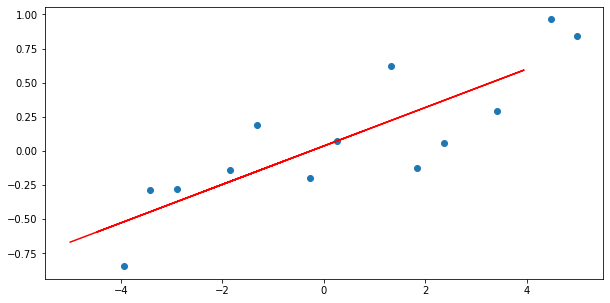

In [ ]:
# 1. Instantiate an Linear Regression model object
linear_regressor = LinearRegression()
# 2. Fit model to the training data
linear_regressor.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
# 3. Make prediction on test input data 
y_pred = linear_regressor.predict(x_test.reshape(-1,1))
# 4. Visualize results
f, ax = plt.subplots(1, 1, figsize=(10, 5)) # make a figure with one row and one column of size 10x5
ax.scatter(x_train, y_train) # scatter plot the training data
ax.plot(x_test, y_pred, 'r')  # plot the learned linear regression function by plotting the predictions
plt.show() # display the figure


**Exercise 1:** Compute the Mean Square Error (MSE) of your model on the training dataset and on the testing dataset.

In [ ]:
# Hint: you can use a pre-defined MSE function in the library documentation at: 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#
## COMPLETE
y_pred_for_tarin=linear_regressor.predict(x_train.reshape(-1,1))
training_mse=mean_squared_error(y_train.reshape(-1,1), y_pred_for_tarin)
test_mse =mean_squared_error(y_test.reshape(-1,1), y_pred)
#
print('MSE on training data is: {}'.format(training_mse))
print('MSE on test data is: {}'.format(test_mse))


MSE on training data is: 0.06837753524138152
MSE on test data is: 0.16164616981894286


**Exercise 2:** Is a linear regressor a good model for this data? Why or why not? Support your answer using concepts you learned from lecture, the visualizations of the data and the model, as well as the MSE.

**Answer:** Actually it hard to say that model is on good on data while you have only one model, it is better to user when you add other model like polynomial regression and compare the result.
But when we use concept we learned from the class, as you see MSE on training data is: 0.09617479806469659 and MSE on test data is: 0.049044229022728016 you can see all error are closer and small which justify that linear regression fit well our data. Also when we visualize the graph you can see it fit well our data even there is same noise.    




Next, let's implement a polynomial regression model for the same dataset.

## 2. Polynomial Regression (using sklearn library)

In this Section, we will experiment with fitting polynomial regression model of various degrees. We will explore how the choice of polynomial degree relates to underfitting and overfitting.

**Exercise 3:** Fit polynomial regression models with degrees equal to 2, 4, and 16. Visualize each model along with the training data. Compute the training and test MSE for each model. 

For degree 2, training MSE is: 0.068, test MSE is: 0.181
For degree 4, training MSE is: 0.045, test MSE is: 0.052
For degree 16, training MSE is: 0.000, test MSE is: 1898591047.589


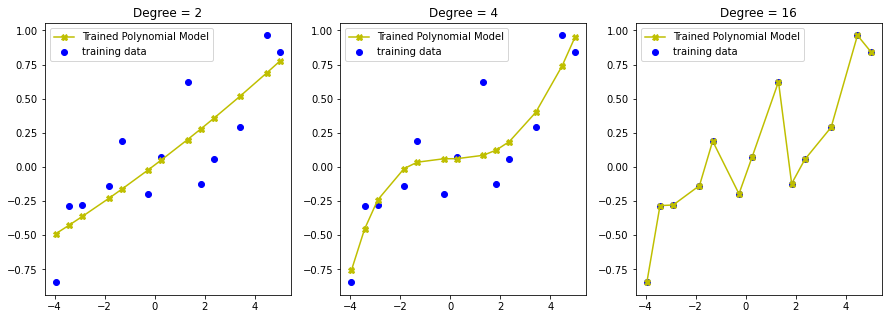

In [ ]:
# Make a list of polynomial degrees we want to try
poly_degree = np.array([2, 4, 16])

# Visualize the three models in a figure with one row and 3 columns, with size 15x5
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over the polynomial degrees and the subplots in the figure
for i in range(3):
  ax[i].scatter(x_train, y_train, color='blue', label='training data') # scatter plot the training data

  # Step 1: 
  # Instantiate a sklearn PolynomialFeatures model of degree=poly_degree[i] 
  # and transform both the training and the testing data to add polynomial features to our datasets.
  # (Hint: look for documentation on sklearn.preprocessing.PolynomialFeatures)
  ## COMPLETE
  degree=poly_degree[i]
  poly_model= PolynomialFeatures(degree)
  # Transform
  x_train_poly= poly_model.fit_transform(x_train[:, np.newaxis])
  x_test_poly= poly_model.fit_transform(x_test[:, np.newaxis])

  # Step 2:
  # Instantiate a LinearRegression model, fit the model, and make predictions on training and test data
  # You should set fit_intercept=False for this LinearRegression model, since the intercept is already
  # generated by PolynomialFeatures
  ## COMPLETE
  model= LinearRegression(fit_intercept=False)
  model.fit(x_train_poly, y_train)
  y_train_poly_pred=model.predict(x_train_poly)
  y_test_poly_pred=model.predict(x_test_poly)

  # Step 3:
  # Plot the learned polynomial regression model by plotting the model prediction against the training input 
  # COMPLETE
  x_plot= x_train.copy()
  y_plot= y_train_poly_pred.copy()
  idxs_sorted = np.argsort(x_plot)
  ax[i].plot(x_plot[idxs_sorted], y_plot[idxs_sorted], color='y', label='Trained Polynomial Model', marker='X')

  # Step 4:
  # Compute and print the training and test MSE.
  # COMPLETE
  mse_train = mean_squared_error(y_train, y_train_poly_pred)
  mse_test = mean_squared_error(y_test, y_test_poly_pred)
  
  print('For degree {}, training MSE is: {:.3f}, test MSE is: {:.3f}'.format(poly_degree[i], mse_train, mse_test))

  ax[i].set_title('Degree = {}'.format(poly_degree[i])) # set the title of the ith subplot
  ax[i].legend(loc='best') # display the legend for the plot

plt.show() # display the figure

**Exercise 4:** Visually, which function is the most appropriate for the data? Why? Support your answer using concepts you learned in lecture.

**Answer:** Visually you can exclude automatically model with degree of freedom 0f 16 because it cover all data even outliers. Even we can see it is overfitting data when we look at its errors where training MSE is: 0.000, test MSE is: 1898591047.58. Test MSE is very higher.
Now let us choose between model with degree 2 and 4. I can choose model with with 4 as degree of freedom  because visually it has best line that fit our data as compared to the one with 2 as degree of freedom.
Also when we look at errors both for training error and testing error it has smallest errors.
NB: I can choose model with degree of freedom 4.  
  



## 3. Can MSE be used to detect overfitting? If yes, how?

**Answer:** 
I can say  **“yes”** although MSE error it can not only reliable way of detecting overfitting but it can be used.
If testing MSE is very high compared to Training error you can suspect overfitting in your model but is not only way you can you use in order to draw conclusion because  highest error can be caused by too much noise in data .


**Exercise 5:** In the previous example, how does the MSE in the train and test set vary as we increase the degree of the polynomial? Based on these values, how can we choose the best polynomial degree for the data?

**Answer:**As we increase degree of freedom training MSE reduced and testing MSE increases, as it reach at point where MSE for test data set increasingly very high this means model reach to the point where overfitting our dataset.
Now you have to choose degree of freedom that is appropriate which cannot Couse our model to be under fitted or over fitted  


---
# The following section is for Extra Credit, it is optional.

## 4. Can MSE be used to detect underfitting? If yes, how?

**Answer:** 
I can say “yes” although MSE error it can not only reliable way of detecting under fitting but it can be used.
If Training and testing MSE is very high and closer to each other you can suspect underfitting in your model but is not only way you can you use in order to draw conclusion because highest error can be caused by too much noise in data .



In the following, let us generate noisy data from $f(x) = x^3$.

We generate two datasets:
* Dataset 1 has low noise.
* Dataset 2 has high noise.

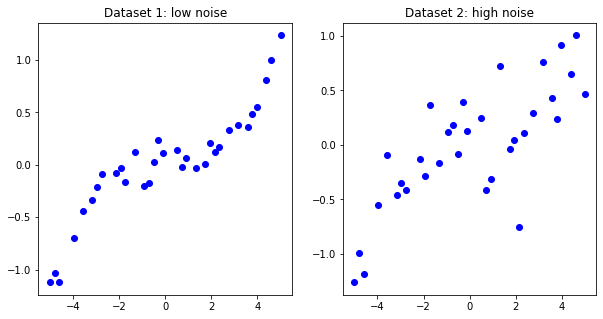

In [ ]:
np.random.seed(10)
# DATASET 1
x1, y1 = generate_toy_data(n_points=50, noise_std=0.1) # generate low noise data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.33, random_state=42) #split data into training and test

# DATASET 2
x2, y2 = generate_toy_data(n_points=50, noise_std=0.4) # generate high noise data
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.33, random_state=42) #split data into training and test

# Visualize the two datasets in a figure with one row and 2 columns, with size 10x5
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x_train1, y_train1, color='blue') # plot dataset 1
ax[1].scatter(x_train2, y_train2, color='blue') # plot dataset 2

ax[0].set_title('Dataset 1: low noise') # set the title for subplot 1
ax[1].set_title('Dataset 2: high noise') # set the title for subplot 2

plt.show() # display the figure

**Exercise 6 (Extra Credit):** Fit a linear regression model to the low noise dataset and a polynomial of degree 3 to the high noise dataset.  Compute training and test MSE for each model.

For low noise dataset, training MSE is: 0.048, test MSE is: 0.041
For high noise dataset, training MSE is: 0.093, test MSE is: 0.326


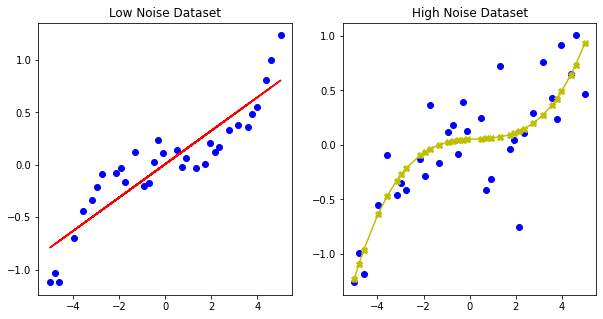

In [ ]:
# Visualize the two models in a figure with one row and 2 columns, with size 10x5
fig, ax = plt.subplots(1, 2,figsize=(10, 5))

# Step 1:
# Instantiate a LinearRegression model, fit the model, and make predictions on training and test data
## COMPLETE
linear_regressor = LinearRegression()
linear_regressor.fit(x_train1.reshape(-1,1),y_train1.reshape(-1,1))
# 3. Make prediction on test input data 
y_pred1=linear_regressor.predict(x_test1.reshape(-1,1))
y_pred_train1=linear_regressor.predict(x_train1.reshape(-1,1))
# Step 2:
# Plot the learned Linear regression model by plotting the model prediction against the training input 
# COMPLETE
#
ax[0].plot(x_train1, y_pred_train1, 'r')  # plot the learned linear regression function by plotting the predictions
#
# Step 3:
# Compute and print the training and test MSE.
# COMPLETE
#

training_mse1=mean_squared_error(y_train1.reshape(-1,1), y_pred_train1)
test_mse1 =mean_squared_error(y_test1.reshape(-1,1), y_pred1)

#
print('For low noise dataset, training MSE is: {:.3f}, test MSE is: {:.3f}'.format(training_mse1, test_mse1))

ax[0].scatter(x_train1, y_train1, color='blue') # plot dataset 1
ax[0].set_title('Low Noise Dataset')

# Step 1: 
# Instantiate a sklearn PolynomialFeatures model of degree=3 
# and transform both the training and the testing data to add polynomial features to our datasets.
# (Hint: look for documentation on sklearn.preprocessing.PolynomialFeatures)
## COMPLETE

poly_model= PolynomialFeatures(3)
# Transform
x_train_poly2= poly_model.fit_transform(x_train2[:, np.newaxis])
x_test_poly2= poly_model.fit_transform(x_test2[:, np.newaxis])



# Step 2:
# Instantiate a LinearRegression model, fit the model, and make predictions on training and test data
## COMPLETE

model2= LinearRegression(fit_intercept=False)
model2.fit(x_train_poly2, y_train2)
y_train_poly_pred2=model2.predict(x_train_poly2)
y_test_poly_pred2=model2.predict(x_test_poly2)

# Step 3:
# Plot the learned polynomial regression model by plotting the model prediction against the training input 
# COMPLETE
#
x_plot2= x_train2.copy()
y_plot2= y_train_poly_pred2.copy()
idxs_sorted = np.argsort(x_plot2)
ax[1].plot(x_plot2[idxs_sorted], y_plot2[idxs_sorted], color='y', label='Trained Polynomial Model', marker='X')
#
# Step 4:
# Compute and print the training and test MSE.
# COMPLETE
#
mse_train2 = mean_squared_error(y_train2, y_train_poly_pred2)
mse_test2 = mean_squared_error(y_test2, y_test_poly_pred2)
#
print('For high noise dataset, training MSE is: {:.3f}, test MSE is: {:.3f}'.format(mse_train2, mse_test2))

ax[1].scatter(x_train2.reshape(-1,1), y_train2, color='blue') # plot dataset 2
ax[1].set_title('High Noise Dataset')

plt.show()

**Exercise 7 (Extra Credit):** Let's compare the way each model fits their respective datasets.

*  **A.** Which model fits the data better, based only on the training and test MSE? Why?

**Answer:** Linear regression for low noise data based on  the training and test MSE is the best model that fit their data as it has smaller error for both training and test data when compared to polynomial model   

* **B.** Remember that both dataset are generated from $f(x) = x^3$, with this fact in mind, which model is the better fit? Why?

**Answer:** Having in mind that data is generated by $f(x) = x^3$ And have too much noise I can say that polynomial model because it has 3 as degree of freedom and try to capture to mush data so that errors for both training and test are smaller.  


*  **C.** What does this experiment say about using MSE to detect underfitting?

**Answer:** This experiment help us to confirm that  MSE is not only way you can only use to  detect underfitting because for example for low noise data it seems like model is very good and for higher noise model is not very good while is contrary. Also to detect underfiting we need to consider nature of data and use other techniques that help to have enough facts that help you 
in  drawing conclusion   
